In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


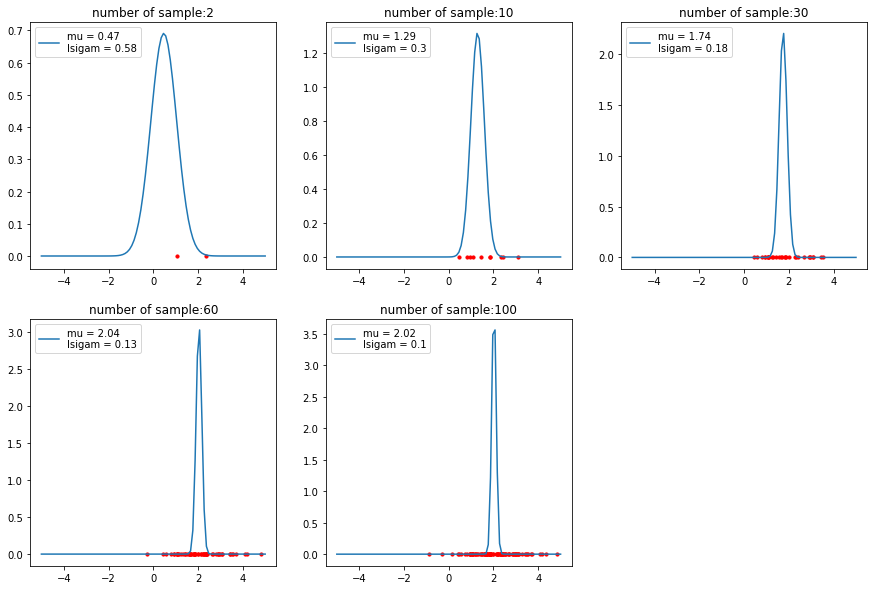

In [21]:
def Gaussian(mu,lam,x):
    return 1/(np.sqrt(2 * (1/lam))) * np.exp(-0.5*lam*(x-mu)**2)
#真の分布
mu_true = 2
lam_true = 1
#事前分布
mu_pr = -2
lam_pr = 1
N = 100

np.random.seed(1103)

X = np.random.normal(mu_true,np.sqrt(1/lam_true),N)
x = np.linspace(-5,5,N)

fig = plt.figure(figsize=(15,10))
x_n = [2,10,30, 60, 100]
for i,n in enumerate(x_n):
    ax = plt.subplot(2,3,i+1)
    sample = X[:n]

    mu_est = (lam_true*sample.mean()+lam_pr*mu_pr/n)/(lam_true+lam_pr/n)
    lam_est = n*lam_true+lam_pr
    
    #平均の事後分布
    x = np.linspace(-5,5,N)
    px_e = norm(mu_est, np.sqrt(1/lam_est)).pdf(x)
    
    ax.scatter(sample,[0]*n,c="r",s=10)
    ax.plot(x,px_e,label = f"mu = {round(mu_est,2)} \nlsigam = {round(np.sqrt(1/lam_est),2)}")
    ax.set_title("number of sample:"+str(n))
    ax.legend(loc = "upper left")


In [ ]:
%debug

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


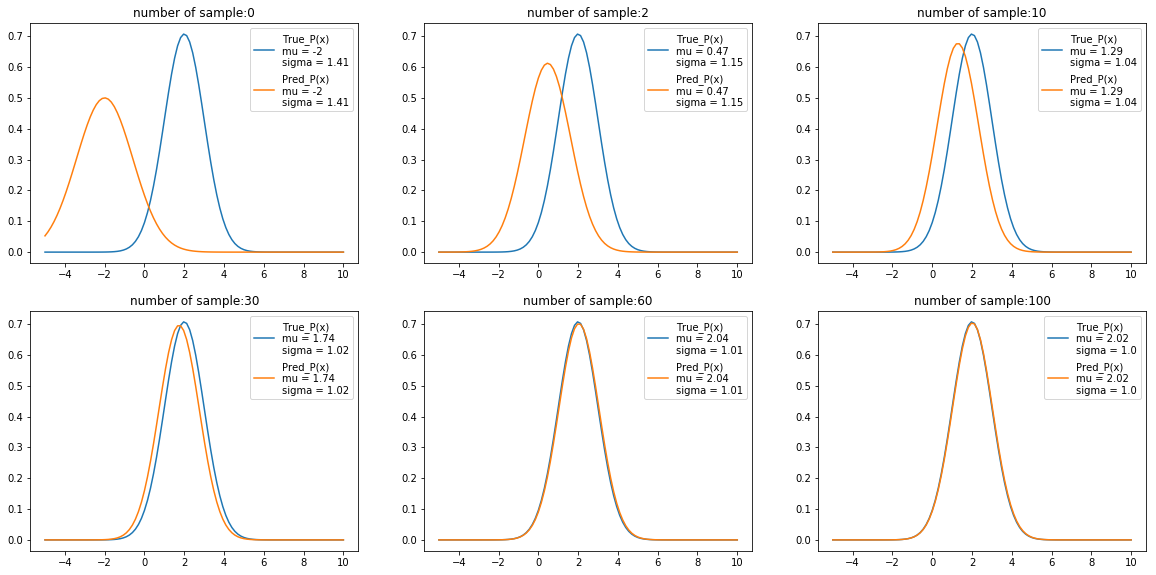

In [104]:
fig = plt.figure(figsize=(20,15))
x_n = [0,2,10,30, 60, 100]
for i,n in enumerate(x_n):
    ax = plt.subplot(3,3,i+1)
    sample = X[:n]
    
    lam_est = lam_true*(lam_true*n+lam_pr)/(lam_true + lam_true*n+lam_pr)
    mu_est = (lam_true*sample.mean()+lam_pr*mu_pr/n)/(lam_true+lam_pr/n) if n!=0 else mu_pr
    
    x = np.linspace(-5,10,N)
    #真の分布
    px_t = Gaussian(mu_true, lam_true,x)
    #予測分布
    px_e = Gaussian(mu_est, lam_est,x)
    #ax.plot(x,px_t)
    ax.plot(x,px_t,label = f"True_P(x)\nmu = {round(mu_est,2)} \nsigma = {round(np.sqrt(1/lam_est),2)}")
    ax.plot(x,px_e,label = f"Pred_P(x)\nmu = {round(mu_est,2)} \nsigma = {round(np.sqrt(1/lam_est),2)}")
    ax.set_title("number of sample:"+str(n))
    ax.legend(loc = "upper right")



/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


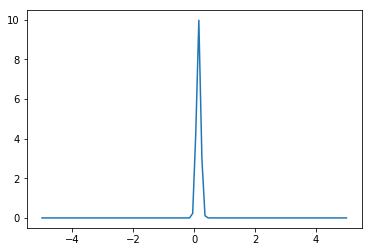

In [34]:
plt.plot(x,px)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


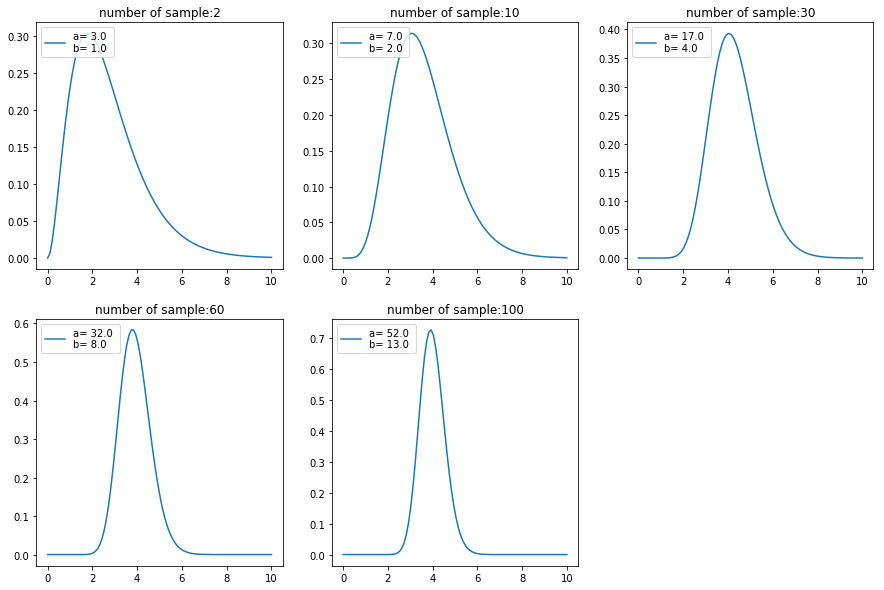

In [12]:
import math
def Gamma(a,b,lam):
    return (b**a/math.gamma(a)) * lam**(a-1) * np.exp(-lam*b)
#真の分布
mu_true = 2
lam_true = 4
#事前分布
a_pr = 2
b_pr = 1
N = 100

np.random.seed(1103)

X = np.random.normal(mu_true,np.sqrt(1/lam_true),N)


fig = plt.figure(figsize=(15,10))
x_n = [2,10,30, 60, 100]
for i,n in enumerate(x_n):
    ax = plt.subplot(2,3,i+1)
    sample = X[:n]

    a_est = n/2 + a_pr
    b_est = 0.5 * ((sample-mu_true)**2).sum()+b_pr
    
    #平均の事後分布
    lam = np.linspace(0,10,N)
    px_e = Gamma(a_est,b_est,lam)
    #bins = np.random.gamma(a_est, b_est, N)
    
    
    ax.plot(lam,px_e,label = f"a= {round(a_est,2)} \nb= {round(b_est)}")
    ax.set_title("number of sample:"+str(n))
    ax.legend(loc = "upper left")


0.0
0.24746415404267655
1.9118861598515344
5.919592223524451
14.366570279622838
24.074903779329283


/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


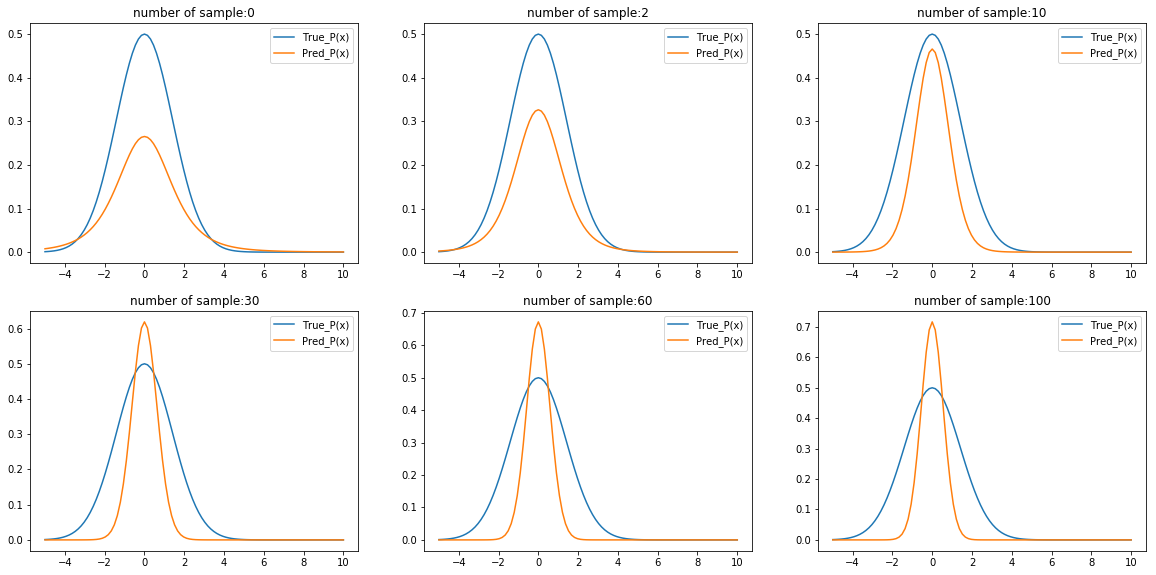

In [37]:
def Gaussian(mu,lam,x):
    return 1/(np.sqrt(2 * (1/lam))) * np.exp(-0.5*lam*(x-mu)**2)
def Student(mu_s, lam_s, nu_s,x):
    return ((math.gamma((nu_s+1)/2)/math.gamma(nu_s/2))*np.sqrt(lam_s/(np.pi*nu_s))) * (1+ (lam_s/nu_s) *(x-mu_s)**2)**((-nu_s-1)/2)
#真の分布
mu_true = 0
lam_true = 4
#事前分布
a_pr = 2
b_pr = 4
N = 100

np.random.seed(1103)

X = np.random.normal(mu_true,np.sqrt(1/lam_true),N)

fig = plt.figure(figsize=(20,15))
x_n = [0,2,10,30, 60, 100]
for i,n in enumerate(x_n):
    ax = plt.subplot(3,3,i+1)
    sample = X[:n]
    
    a_est = n/2 + a_pr
    b_est = 0.5 * ((sample-mu_true)**2).sum()+b_pr
    print(((sample-mu_true)**2).sum())
    x = np.linspace(-5,10,N)
    #真の分布
    px_t = Gaussian(mu_true, np.sqrt(1/lam_true),x)
    #予測分布
    px_e = Student(mu_true,a_est/b_est, 2*a_est,x)
    #ax.plot(x,px_t)
    ax.plot(x,px_t,label = f"True_P(x)")
    ax.plot(x,px_e,label = f"Pred_P(x)")
    ax.set_title("number of sample:"+str(n))
    ax.legend(loc = "upper right")



/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


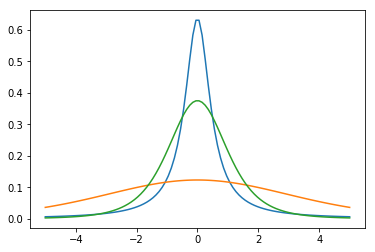

In [33]:

def Student(mu_s, lam_s, nu_s,x):
    return ((math.gamma((nu_s+1)/2)/math.gamma(nu_s/2)) * np.sqrt(lam_s/(np.pi*nu_s))) * (1+ (lam_s/nu_s) *(x-mu_s)**2)**((-nu_s-1)/2)
x = np.linspace(-5,5,100)
plt.plot(x,Student(0,4,1,x),)
plt.plot(x,Student(0,0.1,10,x))
plt.plot(x,Student(0,1,4,x))


In [28]:
math.gamma(100)/2

4.666310772197208e+155

In [129]:
def KL_div(mu1, lambda1, mu2, lambda2):
    D = mu1.reshape(1,-1).shape[1]
    a,b = np.linalg.slogdet(lambda2)
    px_lnqx = 0.5 * a*b - 0.5 * ((mu1 - mu2).T * lambda2 * (mu1 - mu2) + np.trace(lambda2 * np.linalg.inv(lambda1)))
    a,b = np.linalg.slogdet(lambda1)
    px_lnpx = 0.5 * a*b - 0.5 * D
    KL = - (px_lnqx - px_lnpx)
    return KL

D = 2
theta = 2.*np.pi/12
A=np.array([[np.cos(theta), -np.sin(theta)],
            [np.sin(theta), np.cos(theta)]])
mu = np.array([1.,10.])
lambda_ = np.linalg.inv(np.array([[1,0],[0,10]])*A.T)

mu_h = np.random.randn(D)
lambda_h = np.random.randn(D,D)

max_iter = 10
KL = []
result = []
for i in range(1, max_iter+1):
    
    mu_h[0] = mu[0]- 1./lambda_[0,0]*lambda_[0,1]*(mu_h[1]-mu[1])
    lambda_h[0,0] = lambda_[0,0]
    mu_h[1] = mu[1] -1./lambda_[1,1]*lambda_[1,0]*(mu_h[0]-mu[0])
    lambda_h[1,1] = lambda_[1,1]
    
    KL.append(KL_div(mu_h,lambda_h,mu,lambda_))
    
    result.append([mu_h, np.linalg.inv(lambda_h)])
    
    

In [130]:
mu_h

array([ 1., 10.])

In [131]:
lambda_h

array([[ 1.15470054, -0.82220336],
       [-0.89191189,  0.11547005]])

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


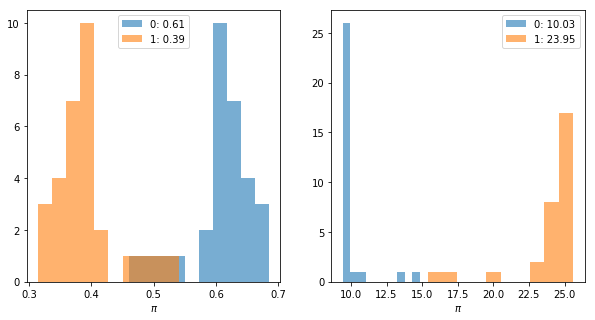

In [104]:
#ギブスサンプリング

import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(1103)

def softmax(X):
    l = []
    for x in X:
        sum_ex = np.sum(np.exp(x))
        l.append([np.exp(i)/sum_ex for i in x])
    return np.array(l)

N = 400

#number of class
K = 2

#paramter of poisson dist
lam = np.ones(K).reshape(1,-1)

#parameter of category dist
pi = np.array([0.5,0.5]).reshape(1,-1)

#latent var
S = np.zeros([N,K])

#parameters of gamma dist
a = np.ones(K)
b = np.ones(K)

#parameters of dirichlet
alpha = np.ones(K)

#train data
x1 = np.random.poisson(lam = 25,size = 150)
x2 = np.random.poisson(lam = 10, size = 250)
X = np.r_[x1,x2].reshape(-1,1)

max_iter = 30

lam_sample,pi_sample =[],[]

for i in range(max_iter):
    
    #S
    ex = X.dot(np.log(lam)) - lam + np.log(pi)
    ex = softmax(ex)

    for n in range(N):
        S[n] = np.random.multinomial(1,ex[n],1)
    
    #λ
    a_hat = X.T.dot(S) + a    
    b_hat = S.sum(axis = 0) + b
    lam = np.random.gamma(a_hat,1/b_hat)
    lam_sample.append(lam[0])
    
    #π
    alpha_hat= S.sum(axis = 0) + alpha
    pi = np.random.dirichlet(alpha_hat)

    pi_sample.append(pi)


fig = plt.figure(figsize=(10,5))
pi_sample = np.array(list((map(list,pi_sample))))
lam_sample = np.array(list((map(list,lam_sample))))

plt.subplot(1,2,1)
for i in range(K):
    pi_m =np.mean(pi_sample[:,i])
    plt.hist(pi_sample[:,i],bins=10,alpha=0.6,label=f"{i}: {round(pi_m,2)}")
plt.xlabel("$π$")
plt.legend()
plt.subplot(1,2,2)
for i in range(K):
    lam_m =np.mean(lam_sample[:,i])
    plt.hist(lam_sample[:,i],bins=10,alpha=0.6,label=f"{i}: {round(lam_m,2)}")
plt.xlabel("$π$")
plt.legend()


In [98]:
a = np.array(list((map(list,pi_sample))))
a[:,1]

array([0.54010315, 0.51446227, 0.45372702, 0.47860758, 0.41078458,
       0.39482143, 0.38796569, 0.40091901, 0.31497894, 0.37344022])

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


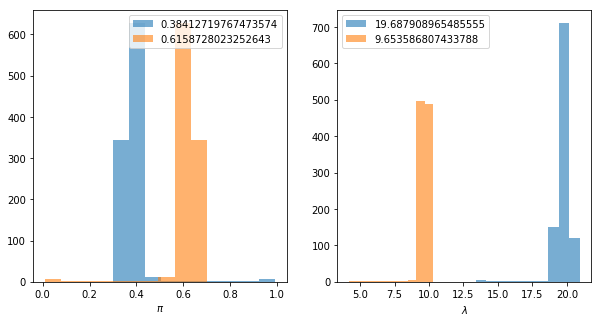

In [18]:
#変分推論
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import digamma
from scipy.stats import dirichlet,gamma
np.random.seed(1103)
def logsumexp(X):
    max_x = np.max(X, axis=1).reshape(-1, 1)
    return np.log(np.sum(np.exp(X - max_x), axis=1).reshape(-1, 1)) + max_x

N = 400

#number of class
K = 2

#paramter of poisson dist
lam = np.ones([1,K]).reshape(1,-1)

#parameter of category dist
pi = np.array([0.5,0.5]).reshape(1,-1)

#latent var
S = np.zeros([N,K])

#parameters of gamma dist
a = 1
b = 1
a_hat=np.ones([1,K])
b_hat=np.ones([1,K])
#parameters of dirichlet
alpha = np.random.randn(1,K)
alpha_hat= np.random.randn(1,K)
#train data
x1 = np.random.poisson(lam = 20,size = 150)
x2 = np.random.poisson(lam = 10, size = 250)
X = np.r_[x1,x2].reshape(-1,1)

max_iter = 1000
sums = 0
lam_sample,pi_sample=[],[]
for i in range(max_iter):
    
    E_lam = a_hat/b_hat
    E_log_lam = digamma(a_hat) - np.log(b_hat)
    E_log_pi = digamma(alpha_hat) - digamma(alpha_hat.sum())

    #潜在変数
    ex = X.dot(E_log_lam) - E_lam + E_log_pi
    tmp = -logsumexp(ex)
    ex = np.exp(ex+tmp)
    
    #λ
    a_hat = X.T.dot(ex) + a 
    b_hat = ex.sum(axis = 0) + b
    lam = np.random.gamma(a_hat,1/b_hat)
    lam_sample.append(lam.flatten())
    
    #π
    alpha_hat= ex.sum(axis = 0) + alpha
    pi = np.random.dirichlet(alpha_hat[0])
    pi_sample.append(pi.flatten())


pi_sample=np.array(pi_sample)
lam_sample=np.array(lam_sample)

pi1_mean = pi_sample[:,0].mean()
pi2_mean = pi_sample[:,1].mean()
lam1_mean = lam_sample[:,0].mean()
lam2_mean = lam_sample[:,1].mean()

fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(pi_sample[:,0],bins=10,alpha=0.6,label = f"{pi1_mean}")
plt.hist(pi_sample[:,1],bins=10,alpha=0.6,label=f"{pi2_mean}")
plt.xlabel("$π$")
plt.legend()

plt.subplot(1,2,2)
plt.hist(lam_sample[:,0],bins=10,alpha=0.6,label = f"{lam1_mean}")
plt.hist(lam_sample[:,1],bins=10,alpha=0.6,label=f"{lam2_mean}")
plt.xlabel("$λ$")
plt.legend()
plt.show()

In [332]:
sums

0

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


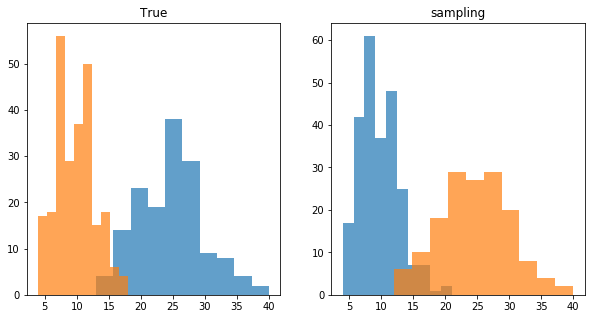

In [105]:
#崩壊型ギブスサンプリング

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
import math

np.random.seed(1103)

def logsumexp(X):
    # \log(\sum_{i=1}^{N}\exp(x_i))
    max_x = np.max(X, axis=1).reshape(-1, 1)
    return np.log(np.sum(np.exp(X - max_x), axis=1).reshape(-1, 1)) + max_x


def cmb(n, r):
    if n - r < r: r = n - r
    if r == 0: return 1
    if r == 1: return n

    numerator = [n - r + k + 1 for k in range(r)]
    denominator = [k + 1 for k in range(r)]

    for p in range(2,r+1):
        pivot = denominator[p - 1]
        if pivot > 1:
            offset = (n - r) % p
            for k in range(p-1,r,p):
                numerator[k - offset] /= pivot
                denominator[k] /= pivot

    result = 1
    for k in range(r):
        if numerator[k] > 1:
            result *= int(numerator[k])

    return result

N = 400
#train data
x1 = np.random.poisson(lam = 25,size = 150)
x2 = np.random.poisson(lam = 10, size = 250)
X = np.r_[x1,x2].reshape(-1,1)

#number of class
K = 2

#latent var
S = np.ones([N,K])

#parameters of gamma dist
a=1
b=1
a_hat = X.T.dot(S) + a
b_hat = S.sum(axis=0)+ b

#parameters of dirichlet
alpha = np.random.randn(1,K)
alpha_hat = S.sum(axis=0)+ alpha


max_iter = 10

for i in range(max_iter):
    for n in range(N):

        a_hat -= S[n]*X[n]
        b_hat -= S[n]
        alpha_hat -= S[n]
        
        gam = alpha_hat/(alpha_hat).sum(axis=0)
        bb = 1./(b_hat+1.)
        log_cnb = np.array([math.log(cmb(int(X[n][0]+i-1),int(X[n][0]))) for i in a_hat[0]])
        ex = np.log(gam) + a_hat*np.log(1-bb) + X[n]*np.log(bb) + log_cnb
        ex = np.exp(ex-logsumexp(ex))
        S[n] = np.random.multinomial(1,ex[0],1)
        
        a_hat += S[n]*X[n]
        b_hat += S[n]
        alpha_hat += S[n]


fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(x1,alpha=0.7)
plt.hist(x2,alpha=0.7)
plt.title("True")

plt.subplot(1,2,2)
c = ["r","g"]
x,y=[],[]
for i in range(N):
    if int(np.array(S)[:,0][i]) == 0:
        x.append(X[i])
    else:
        y.append(X[i])

plt.hist(np.array(x).flatten(),alpha=0.7)
plt.hist(np.array(y).flatten(),alpha=0.7)
plt.title("sampling")
plt.show()

[14 16 26 17 24 27 16 20 19 14 22 23 25 23 23 23 19 20 22 18 12 20 23 20
 25 29 19 20 14 31 18 20 25 21 16 19 28 28 18 20 33 22 25 23 25 20 19 20
 25 21 20 23 22 23 27 15 22 22 23 16 25 24 18 23 19 16 18 17 19 17 24 14
 26 22 21 18 18 21 30 20 20 16 21 18 23 19 19 27 19 23 21 20 31 29 21 21
 17 19 20 16 20 18 16 23 23 20 24 21 20 18 24 21 19 16 24 19 16 16 21 26
 24 19 17 20 19 16 26 15 18 13 14 10 13 10 11 16 18 14 10 17 14 19]


/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


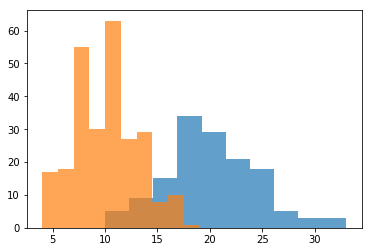

In [227]:
c = ["r","g"]
x,y=[],[]
for i in range(N):
    if int(np.array(S)[:,0][i]) == 0:
        x.append(X[i])
    else:
        y.append(X[i])
print(np.array(x).flatten())
plt.hist(np.array(x).flatten(),alpha=0.7)
plt.hist(np.array(y).flatten(),alpha=0.7)
plt.show()

In [213]:
np.array(S)[:,0][1]

0.0

In [125]:
1./(b_hat[1]+1.)

0.006535947712418301

(array([28., 28., 31., 23., 14., 11.,  7.,  3.,  1.,  4.]),
 array([ 1. ,  7.1, 13.2, 19.3, 25.4, 31.5, 37.6, 43.7, 49.8, 55.9, 62. ]),
 <a list of 10 Patch objects>)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


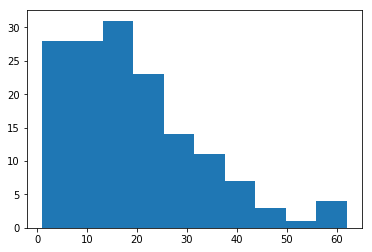

In [179]:

plt.hist(y_n)

(array([17., 18., 55., 29., 64., 23., 27.,  6.,  8.,  3.]),
 array([ 4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. , 17.5, 19. ]),
 <a list of 10 Patch objects>)

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


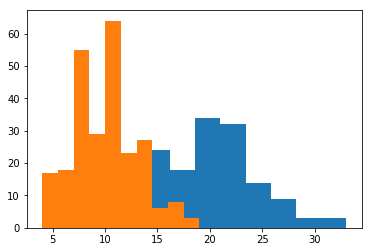

In [121]:
plt.hist(x1)
plt.hist(x2)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: covariance is not symmetric positive-semidefinite.


Text(0.5,1,'sampling by predicted parameter')

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


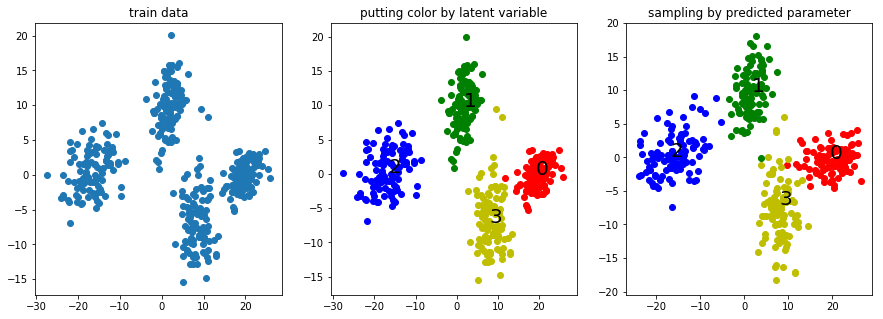

In [3]:
#混合ガウス ギブスサンプリング
import matplotlib.pyplot as plt
import numpy as np
import math
def dataset(n,n_cluster):

    true_mu = []
    true_mu.append([2,10])
    true_mu.append([-17,0])
    true_mu.append([8,-7])
    true_mu.append([20,0])
    
    true_cov = []

    true_cov.append([[3,1],[1,12]])
    true_cov.append([[11,2],[2,9]])
    true_cov.append([[5,0],[0,18]])
    true_cov.append([[5,5],[5,1]])

    data = []
    for k in range(n_cluster):
        data.append(np.random.multivariate_normal(true_mu[k],true_cov[k],int(n/n_cluster)))

    data = np.vstack(data)

    return data

def sampling_S(N,K,pi,mu,lam,X):
    eta = np.zeros((N,K))
    S = np.zeros((N,K))
    for n in range(N):
        for k in range(K):
            x_m = X[n]-mu[k]
            eta[n,k] = np.exp(-0.5*x_m.dot(lam[k]).dot(x_m.T) + np.log(pi[k])+0.5*np.log(np.linalg.det(lam[k])))
  
    eta = eta/(eta.sum(axis=1).reshape(-1,1))
    for n in range(N):
        S[n] = np.random.multinomial(1,eta[n])
    
    return S

def sampling_pi(N,K,S):
    alpha = np.ones(K)
    alpha_hat = np.zeros(K)
    
    alpha_hat = S.sum(axis = 0) + alpha
    pi = np.random.dirichlet(alpha_hat)
    return pi

def sampling_mu_lam(N,K,X,S,D):
    m = np.ones(D)
    beta = 1.0
    v = np.ones(K)*2
    W = np.eye(2)

    beta_hat = np.zeros(K)
    m_hat = np.zeros((K,2))
    
    pred_mu = np.ones((K,D))
    pred_lam = np.array([np.eye(D) for i in range(K)])
    for k in range(K):
        tm = np.zeros(D)
        for n in range(N):
            tm += S[n,k]*X[n]
            
        beta_hat[k] = S[:,k].sum() + beta
        m_hat[k] = (tm + beta*m)/beta_hat[k]

    for k in range(K):
        tm = np.zeros([D,D])
        for n in range(N):
            tm += S[n,k]*(X[n].reshape(-1,1).dot(X[n].reshape(-1,1).T))
        

        v_hat = S[:,k].sum() + v[k]
        W_hat_inv = tm + beta*m.T.dot(m) - beta_hat[k]*m_hat[k].reshape(-1,1).dot(m_hat[k].reshape(-1,1).T)+ np.linalg.inv(W)

        pred_lam[k]= v_hat * np.linalg.inv(W_hat_inv) # wishart分布からサンプリングできなかったので、期待値
        pred_mu[k] = np.random.multivariate_normal(m_hat[k], np.linalg.inv(beta_hat[k]*pred_lam[k]))
        
    return pred_mu,pred_lam


K = 4
D=2
N = 400
X = dataset(N,K)

pi = np.ones(K)

S = np.ones([N,K])
mu=np.ones((K,D))
lam = np.array([np.eye(D) for i in range(K)])

max_iter = 60

for i in range(max_iter):
    
    S = sampling_S(N,K,pi,mu,lam,X)

    mu,lam = sampling_mu_lam(N,K,X,S,D)

    pi = sampling_pi(N,K,S)

    
c = ["r","g","b","y"]
fig = plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1])
plt.title("train data")

plt.subplot(1,3,2)
for i in range(N):
    plt.scatter(X[i,0],X[i,1],c=c[list(S[i]).index(1)])
for i in range(K):
    plt.text(mu[i,0],mu[i,1],s = f"{i}",size = 20)
plt.title("putting color by latent variable")

plt.subplot(1,3,3)

for k in range(K):
    x = np.random.multivariate_normal(mu[k],np.linalg.inv(lam[k]),size=100)
    plt.scatter(x[:,0],x[:,1],c=c[k])
for i in range(K):
    plt.text(mu[i,0],mu[i,1],s = f"{i}",size = 20)
plt.title("sampling by predicted parameter")

In [18]:
mu,np.linalg.inv(lam)

(array([[ 19.3193473 ,  -0.20201413],
        [  1.62242894,   9.80484557],
        [-16.63054816,   0.13036113],
        [  8.02566192,  -7.09367986]]), array([[[ 9.1667108 ,  1.60873887],
         [ 1.60873887,  3.62699526]],
 
        [[ 3.79587212,  2.29061685],
         [ 2.29061685, 12.42691038]],
 
        [[16.24018627,  3.26488943],
         [ 3.26488943,  8.8445594 ]],
 
        [[ 5.15816678, -0.45936982],
         [-0.45936982, 19.34907369]]]))

In [3]:
#混合ガウス変分推論

import numpy as np
import math
from scipy.special import digamma
def dataset(n,n_cluster):
    np.random.seed(1103)
    
    true_mu = []
    true_mu.append([2,10])
    true_mu.append([-10,0])
    true_mu.append([18,-7])
    true_mu.append([20,0])
    
    true_cov = []

    true_cov.append([[3,1],[1,12]])
    true_cov.append([[11,2],[2,9]])
    true_cov.append([[5,0],[0,18]])
    true_cov.append([[5,5],[5,1]])

    data = []
    for k in range(n_cluster):
        data.append(np.random.multivariate_normal(true_mu[k],true_cov[k],int(n/n_cluster)))

    data = np.vstack(data)

    return data

class Variational_Inference:
    
    def __init__(self,N,K,D,max_iter):
        self.K = K
        self.D=D
        self.N =N 
        self.pi = np.ones(K)
        self.S = np.ones([N,K])
        self.mu=np.ones((K,D))
        self.lam = np.array([np.eye(D) for i in range(K)])
    
        self.v_hat = np.ones(K)*2
        self.W_hat = np.array([np.eye(D) for i in range(K)])
        self.m_hat = np.zeros((K,D))
        self.beta_hat = np.ones(K)
        self.alpha_hat = np.ones(K)
        
        self.max_iter = max_iter
    
    def logsumexp(self,X):
        # \log(\sum_{i=1}^{N}\exp(x_i))
        max_x = np.max(X, axis=1).reshape(-1, 1)
        return np.log(np.sum(np.exp(X - max_x), axis=1).reshape(-1, 1)) + max_x

    def update_S(self,pi, mu,lam,X):
        eta = np.zeros((self.N,self.K))
        S = np.zeros((self.N,self.K))
        
        #期待値計算
        E_log_pi = digamma(self.alpha_hat) - digamma(self.alpha_hat.sum())
        E_lam = np.array([np.eye(self.D) for i in range(self.K)])
        E_lam_mu = np.ones([self.K,self.D])
        E_mu_lam_mu = np.ones((self.K,1))
        E_log_pi = digamma(self.alpha_hat) - digamma(self.alpha_hat.sum())
        
        for n in range(self.N):
            for k in range(self.K):
                tmp=0
                E_lam[k] = self.v_hat[k]*self.W_hat[k]
                
                E_lam_mu[k] = self.v_hat[k]*self.W_hat[k].dot(self.m_hat[k].T)
                E_mu_lam_mu[k] = (self.v_hat[k]*self.m_hat[k].dot(self.W_hat[k]).reshape(1,-1).dot(self.m_hat[k]).reshape(-1,1)+self.D/self.beta_hat[k])[0][0]
                for d in range(self.D):
                    tmp += digamma((self.v_hat[k]+1-d)/2)
                E_log_lam = tmp + self.D*np.log(2) + np.log(np.linalg.det(self.W_hat[k]))
                x_m = X[n]-mu[k]
                eta[n,k] = -0.5*x_m@E_lam[k]@x_m + X[n]@E_lam_mu[k] - 0.5*E_mu_lam_mu[k] +0.5*E_log_pi[k]+0.5*E_log_lam
                

        #eta = eta/(eta.sum(axis=1).reshape(-1,1))
        eta = np.exp(eta-self.logsumexp(eta))
        for n in range(N):
            S[n] = np.random.multinomial(1,eta[n])

        return S,eta

    def update_pi(self,S):
        alpha = np.ones(self.K)
        self.alpha_hat = S.sum(axis = 0) + alpha
        pi = np.random.dirichlet(self.alpha_hat)
        return pi

    def update_mu_lam(self,X,S,eta):
        #事前分布のパラメータ
        m = np.ones(self.D)
        v = 3
        W = np.eye(2)
        beta = 2
        pred_mu = np.ones((self.K,self.D))
        pred_lam = np.array([np.eye(self.D) for i in range(self.K)])
        for k in range(self.K):
            tm = np.zeros(self.D)
            for n in range(self.N):
                tm += eta[n,k]*X[n]

            self.beta_hat[k] = eta[:,k].sum() + beta
            self.m_hat[k] = (tm + beta*m)/self.beta_hat[k]

        for k in range(self.K):
            tm = np.zeros([self.D,self.D])
            for n in range(N):
                tm += eta[n,k]*(X[n].reshape(-1,1).dot(X[n].reshape(-1,1).T))

            
            self.v_hat[k] = eta[:,k].sum() + v
            W_hat_inv = tm + beta*m.T.dot(m) - self.beta_hat[k]*self.m_hat[k].reshape(-1,1).dot(self.m_hat[k].reshape(-1,1).T)+ np.linalg.inv(W)

            pred_lam[k]= self.v_hat[k] * np.linalg.inv(W_hat_inv) # wishart分布からサンプリングできなかったので、期待値
            pred_mu[k] = np.random.multivariate_normal(self.m_hat[k], np.linalg.inv(self.beta_hat[k]*pred_lam[k]))
            

        return pred_mu,pred_lam

K = 4
D=2
N = 200
X = dataset(N,K)

pi = np.ones(K)
S = np.ones([N,K])
mu=np.ones((K,D))
lam = np.array([np.eye(D) for i in range(K)])

max_iter = 20

model = Variational_Inference(N,K,D,max_iter)

for i in range(max_iter):
    
    S,eta = model.update_S(pi,mu,lam,X)

    mu,lam = model.update_mu_lam(X,S,eta)

    pi = model.update_pi(S)

import matplotlib.pyplot as plt
c = ["r","g","b","y"]
fig = plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1])
plt.title("train data")

plt.subplot(1,3,2)
for i in range(N):
    plt.scatter(X[i,0],X[i,1],c=c[list(S[i]).index(1)])

plt.title("put color by latent variable")

plt.subplot(1,3,3)

for k in range(K):
    x = np.random.multivariate_normal(mu[k],np.linalg.inv(lam[k]),size=100)
    plt.scatter(x[:,0],x[:,1],c=c[k])
plt.title("sampling by predicted parameter")


Text(0.5,1,'sampling by predicted parameter')

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


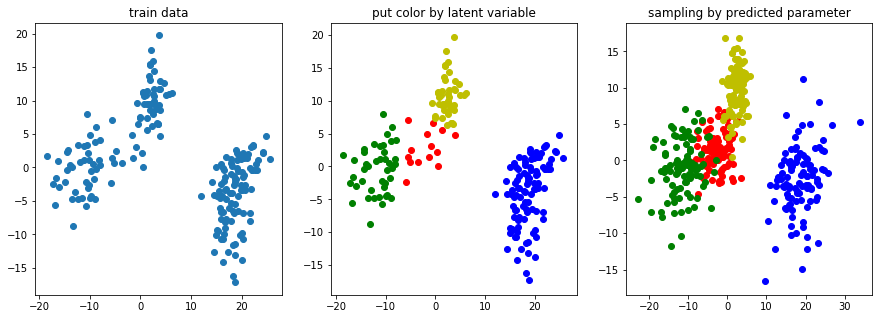

In [7]:
import matplotlib.pyplot as plt
c = ["r","g","b","y"]
fig = plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1])
plt.title("train data")

plt.subplot(1,3,2)
for i in range(N):
    plt.scatter(X[i,0],X[i,1],c=c[list(S[i]).index(1)])

plt.title("put color by latent variable")

plt.subplot(1,3,3)

for k in range(K):
    x = np.random.multivariate_normal(mu[k],np.linalg.inv(lam[k]),size=100)
    plt.scatter(x[:,0],x[:,1],c=c[k])
plt.title("sampling by predicted parameter")

In [239]:
mu

array([[-11.08026588,  -0.65314298],
       [  2.70591126,  11.18442969],
       [ 18.51859264,  -3.34795472],
       [ -2.46532702,   2.84695542]])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:90: RuntimeWarning: invalid value encountered in log


ValueError: 1 is not in list

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


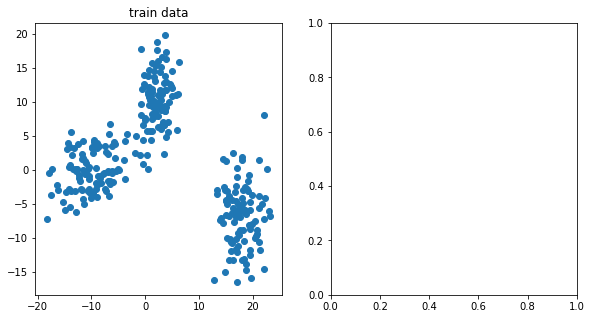

In [3]:
#崩壊型ギブスサンプリング

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import math

np.random.seed(1103)
def dataset(n,n_cluster):
    
    true_mu = []
    true_mu.append([2,10])
    true_mu.append([-10,0])
    true_mu.append([18,-7])
    true_mu.append([20,0])
    
    true_cov = []

    true_cov.append([[3,1],[1,12]])
    true_cov.append([[11,2],[2,9]])
    true_cov.append([[5,0],[0,18]])
    true_cov.append([[5,5],[5,1]])

    data = []
    for k in range(n_cluster):
        data.append(np.random.multivariate_normal(true_mu[k],true_cov[k],int(n/n_cluster)))

    data = np.vstack(data)

    return data

def logsumexp(X):
    # \log(\sum_{i=1}^{N}\exp(x_i))
    max_x = np.max(X, axis=0).reshape(-1, 1)
    return np.log(np.sum(np.exp(X - max_x), axis=1).reshape(-1, 1)) + max_x

def init_param_hat(N,K,D,v,beta,W,m,alpha,S,x):
    
    beta_hat =S.sum(axis = 0)+ beta
    v_hat =S.sum(axis = 0)+ v
    alpha_hat = S.sum(axis=0)+ alpha
    tm1,tm2 = 0,0
    W_inv_hat = np.array([np.eye(D) for i in range(K)])
    m_hat = np.zeros((K,D))
    for k in range(K):
        for n in range(N):
            tm1 += S[n,k]*x[n]@x[n]
            tm2 += S[n,k]*x[n]
        m_hat[k] = (tm2 + beta * m)/beta_hat[k]
        W_inv_hat[k] = tm1 + beta*m.T@m + np.linalg.inv(W) - beta_hat[k]*m_hat[k].reshape(-1,1)@m_hat[k].reshape(1,-1)
    return beta_hat,v_hat,m_hat,W_inv_hat,alpha_hat
N = 300
K=3
D=2
#train data
X = dataset(N,K)

#latent var
S = np.ones([N,K])

beta = 2
v = 3
W = np.eye(2)
m = np.ones(D)
alpha = 2

beta_hat,v_hat,m_hat,W_inv_hat,alpha_hat = init_param_hat(N,K,D,v,beta,W,m,alpha,S,X)
max_iter = 10

for i in range(max_iter):
    for n in range(N):

        beta_hat -= S[n]
        v_hat -= S[n]
        m_hat -= (S[n].reshape(-1,1)@X[n].reshape(1,-1) + beta*m)/beta_hat.reshape(-1,1)
        for k in range(K):
            #x_m = X[n]-m
            #W_inv_hat[k] -= S[n,k]*((x_m.reshape(-1,1)@x_m.reshape(1,-1))/beta_hat[k])
            W_inv_hat[k] -= S[n,k]*X[n].reshape(-1,1)@X[n].reshape(1,-1) - beta_hat[k]*m_hat[k].reshape(-1,1)@m_hat[k].reshape(1,-1)
        alpha_hat -= S[n]
        
        gam = alpha_hat/(alpha_hat).sum(axis=0)
        tmp = np.zeros(K)
        for k in range(K):
            a = 0.5*(-v_hat[k]-1)
            vs = 1-D+v_hat[k]
            lam = (beta_hat[k]*vs*np.linalg.inv(W_inv_hat[k]))/(1+beta_hat[k])
            x_m = X[n]-m_hat[k]
            
            tmp[k] = np.exp(a * np.log(1 + (x_m.reshape(1,-1)@lam@x_m.reshape(-1,1))/vs)+np.log(alpha_hat[k])+ np.log(gamma((vs+D)/2))-np.log(gamma(vs/2)))#-np.log(np.pi*vs)**(1/2)+np.log(np.linalg.det(lam)**0.5)
        tmp = tmp/(tmp.sum())

        #tmp = np.exp(tmp - logsumexp(tmp))[0]
        S[n] = np.random.multinomial(1,tmp)
        
        beta_hat += S[n]
        v_hat += S[n]
        m_hat += (S[n].reshape(-1,1)@X[n].reshape(1,-1) + beta*m)/beta_hat.reshape(-1,1)
        for k in range(K):
            #x_m = X[n]-m
            #W_inv_hat[k] += S[n,k]*((x_m.reshape(-1,1)@x_m.reshape(1,-1))/beta_hat[k])
            W_inv_hat[k] -= S[n,k]*X[n].reshape(-1,1)@X[n].reshape(1,-1) - beta_hat[k]*m_hat[k].reshape(-1,1)@m_hat[k].reshape(1,-1)
        alpha_hat += S[n]

import matplotlib.pyplot as plt
c = ["r","g","b","y"]
fig = plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1])
plt.title("train data")

plt.subplot(1,3,2)
for i in range(N):
    plt.scatter(X[i,0],X[i,1],c=c[list(S[i]).index(1)])

plt.title("put color by latent variable")


In [20]:
(S[0].reshape(-1,1)@X[0].reshape(1,-1) + beta*m)/beta_hat.reshape(-1,1)

array([[0.00846897, 0.04435244],
       [0.00846897, 0.04435244],
       [0.00846897, 0.04435244]])

In [2]:
#混合ガウス変分推論

import numpy as np
import math
from scipy.special import digamma
def dataset(n,n_cluster):
    np.random.seed(1103)
    
    true_mu = []
    true_mu.append([2,10])
    true_mu.append([-10,0])
    true_mu.append([18,-7])
    true_mu.append([20,0])
    
    true_cov = []

    true_cov.append([[3,1],[1,12]])
    true_cov.append([[11,2],[2,9]])
    true_cov.append([[5,0],[0,18]])
    true_cov.append([[5,5],[5,1]])

    data = []
    for k in range(n_cluster):
        data.append(np.random.multivariate_normal(true_mu[k],true_cov[k],int(n/n_cluster)))

    data = np.vstack(data)

    return data

class Variational_Inference:

    def __init__(self,N,K,D,max_iter):
        self.K = K
        self.D=D
        self.N =N 
        self.pi = np.ones(K)
        self.S = np.ones([N,K])
        self.mu=np.ones((K,D))
        self.lam = np.array([np.eye(D) for i in range(K)])
    
        self.v_hat = np.ones(K)*2
        self.W_hat = np.array([np.eye(D) for i in range(K)])
        self.m_hat = np.zeros((K,D))
        self.beta_hat = np.ones(K)
        self.alpha_hat = np.ones(K)
        
        self.max_iter = max_iter
    
    def logsumexp(self,X):
        # \log(\sum_{i=1}^{N}\exp(x_i))
        max_x = np.max(X, axis=1).reshape(-1, 1)
        return np.log(np.sum(np.exp(X - max_x), axis=1).reshape(-1, 1)) + max_x

    def update_S(self,pi, mu,lam,X):
        eta = np.zeros((self.N,self.K))
        S = np.zeros((self.N,self.K))
        
        #期待値計算
        E_log_pi = digamma(self.alpha_hat) - digamma(self.alpha_hat.sum())
        E_lam = np.array([np.eye(self.D) for i in range(self.K)])
        E_lam_mu = np.ones([self.K,self.D])
        E_mu_lam_mu = np.ones((self.K,1))
        E_log_pi = digamma(self.alpha_hat) - digamma(self.alpha_hat.sum())
        
        for n in range(self.N):
            for k in range(self.K):
                tmp=0
                E_lam[k] = self.v_hat[k]*self.W_hat[k]
                
                E_lam_mu[k] = self.v_hat[k]*self.W_hat[k].dot(self.m_hat[k].T)
                E_mu_lam_mu[k] = (self.v_hat[k]*self.m_hat[k].dot(self.W_hat[k]).reshape(1,-1).dot(self.m_hat[k]).reshape(-1,1)+self.D/self.beta_hat[k])[0][0]
                for d in range(self.D):
                    tmp += digamma((self.v_hat[k]+1-d)/2)
                E_log_lam = tmp + self.D*np.log(2) + np.log(np.linalg.det(self.W_hat[k]))
                x_m = X[n]-mu[k]
                eta[n,k] = -0.5*x_m@E_lam[k]@x_m + X[n]@E_lam_mu[k] - 0.5*E_mu_lam_mu[k] +0.5*E_log_pi[k]+0.5*E_log_lam
                

        #eta = eta/(eta.sum(axis=1).reshape(-1,1))
        eta = np.exp(eta-self.logsumexp(eta))
        for n in range(N):
            S[n] = np.random.multinomial(1,eta[n])

        return S,eta

    def update_pi(self,S):
        alpha = np.ones(self.K)
        self.alpha_hat = S.sum(axis = 0) + alpha
        pi = np.random.dirichlet(self.alpha_hat)
        return pi

    def update_mu_lam(self,X,S,eta):
        #事前分布のパラメータ
        m = np.ones(self.D)
        v = 3
        W = np.eye(2)
        beta = 2
        pred_mu = np.ones((self.K,self.D))
        pred_lam = np.array([np.eye(self.D) for i in range(self.K)])
        for k in range(self.K):
            tm = np.zeros(self.D)
            for n in range(self.N):
                tm += eta[n,k]*X[n]

            self.beta_hat[k] = eta[:,k].sum() + beta
            self.m_hat[k] = (tm + beta*m)/self.beta_hat[k]

        for k in range(self.K):
            tm = np.zeros([self.D,self.D])
            for n in range(N):
                tm += eta[n,k]*(X[n].reshape(-1,1).dot(X[n].reshape(-1,1).T))

            
            self.v_hat[k] = eta[:,k].sum() + v
            W_hat_inv = tm + beta*m.T.dot(m) - self.beta_hat[k]*self.m_hat[k].reshape(-1,1).dot(self.m_hat[k].reshape(-1,1).T)+ np.linalg.inv(W)

            pred_lam[k]= self.v_hat[k] * np.linalg.inv(W_hat_inv) # wishart分布からサンプリングできなかったので、期待値
            pred_mu[k] = np.random.multivariate_normal(self.m_hat[k], np.linalg.inv(self.beta_hat[k]*pred_lam[k]))
            

        return pred_mu,pred_lam




In [2]:
pwd

'/Users/kenji/Desktop'

In [10]:
freqs.max()

22050.0

In [18]:
import MeCab
N=[]
w2v= {}
v2w = {}
c = 0
D = 0
W = []

with open("test.txt") as f:
    m = MeCab.Tagger()
    for i in f:
        t_sp = m.parse(i.replace(" ","")).split("\n")
        t = [t_sp[i].split("\t") for i in range(len(t_sp))]
        D +=1
        N.append(len(t_sp[:len(t_sp)-2])-1)
        for w in t:
            if len(w)<=1:
                continue

            #if w[1].split(",")[0] != "記号": #== "名詞" or  w[1].split(",")[0] == "動詞":
            if w[0] not in w2v :
                w2v[w[0]] = c
                v2w[c] = w[0]
                c+=1
with open("test.txt") as f:
    m = MeCab.Tagger("-Owakati")
    for i in f:
        t_sp = m.parse(i.replace(" ","")).split(" ")

        W.append([w2v[w] for w in t_sp[:len(t_sp)-1]])

V = len(w2v)
K = 3
alpha, beta = 1.0+abs(np.random.randn(K)), 1.0+abs(np.random.randn(K))
alpha_new = np.ones((D, K)) 
beta_new = np.ones((K, V)) 
theta = np.ones((D,K))/2 #各文書ごとのトピック比率
phi = np.ones((K,V))/2 # 各トピックでの単語の出現比率



# generate documents
Z,eta = [], []

for n in N:
    Z.append([np.identity(K)[np.random.choice(range(0,K))] for _ in range(n)])
    eta.append(np.ones(n))

In [20]:
from scipy.special import digamma
def logsumexp(X):
    # \log(\sum_{i=1}^{N}\exp(x_i))
    max_x = np.max(X, axis=0).reshape(-1, 1)
    return np.log(np.sum(np.exp(X - max_x), axis=1).reshape(-1, 1)) + max_x



for i in range(100):
    
    
    E_log_phi = digamma(beta_new) - digamma(np.sum(beta_new, axis = 1,keepdims=True))
    E_log_theta = digamma(alpha_new) - digamma(np.sum(alpha_new, axis = 1,keepdims=True))
    E_z = []
    beta_new = np.ones((K, V)) 
    #Z更新
    for (d ,Nn) in enumerate(N):
        tmp = []

        for n in range(Nn):
            eta = E_log_theta[d] + (W[d][n] - (W[d][n]-1))*E_log_phi[:,W[d][n]]

            eta = np.exp(eta-logsumexp(eta))
            Z[d][n] = np.random.multinomial(1,eta[0])
            tmp.append(eta[0])
    
        E_z.append(np.array(tmp))
    
    #theta更新
    E_z_a= [np.array(E_z)[d].sum(axis=0) for d in range(D)]
    for d in range(D):
        alpha_new[d] = E_z_a[d]+alpha
        theta[d] = np.random.dirichlet(alpha_new[d])
    
    # phi 更新
    for k in range(K):
        for (d,Nn) in enumerate(N):    
            for n in range(Nn):
                beta_new[k] += np.array(E_z)[d][n][k] * np.identity(V)[W[d][n]]
        phi[k] = np.random.dirichlet(beta_new[k]+beta[k])
        
        
f = {0:[],1:[],2:[]}
for z,vv in zip(Z,W):
    for i,v in zip(z,vv):
        f[list(i).index(1)].append(v2w[v])

In [617]:
[[v2w[i] for i in W[j]] for j in range(len(W))]

[['日本', '防衛', '長', '射程', '重視', 'に', '変質', 'も'],
 ['合', '区', 'で', '活用', '参院', '特定', '枠', 'って'],
 ['21', '議員', 'の', '政治', '資金', '使途', '不透明'],
 ['公害', 'で', '死ん', 'だ', '娘', '語り継ぐ', '教訓'],
 ['「', '隠れ', 'た', '被害', '者', '」', '加害', '者', 'の', '子'],
 ['ふるさと', '納税', '寄付', 'が', '広告', '費', 'に'],
 ['全国', 'に', '外国', '人', '相談', '窓口', '通訳', 'も'],
 ['ぐずり', 'に', 'スマホ', '非難', 'に', '悩む', '親']]

In [1]:
f = {0:[],1:[],2:[]}
for z,vv in zip(Z,W):
    for i,v in zip(z,vv):

        f[list(i).index(1)].append(v2w[v])


NameError: name 'Z' is not defined

In [180]:
import os
from pathlib import Path


w2v = {}
v2w = {}
D = 0
N = []
# タイトル、記事、メディアを収集
titles, articles, labels = [], [], []
news_list = ['dokujo-tsushin' ,'it-life-hack', 'kaden-channel', 'livedoor-homme', 'movie-enter', 'peachy', 'smax', 'sports-watch', 'topic-news']
news_list = ['sports-watch']
for i, media in enumerate(news_list):
    files = os.listdir(Path('text', media)) #ディレクトリ下の全てのファイル抽出
    for file_name in files:
        if file_name == 'LICENSE.txt':
            continue
        with Path('text', media, file_name).open(encoding='utf-8') as f:
            lines = [line for line in f]
            title = lines[2].replace('\n', '')
            text = ''.join(lines[3:])
            titles.append(title)
            articles.append(text.replace('\n', ''))
            labels.append(i)



import MeCab as mc
import numpy as np
def creat_dict(x):
    global D
    word = []
    m = mc.Tagger()
    t_sp = m.parse(x.replace(" ","")).split("\n")
    t = [t_sp[i].split("\t") for i in range(len(t_sp))]
    D +=1
    for w in t:
        if len(w)<=1:
            continue
        
        if w[1].split(",")[0] == ("名詞"):
            if w[0] not in w2v :
                v2w[len(w2v)] = w[0]
                w2v[w[0]] = len(w2v)

            word.append(w[0])
    N.append(len(word))
    return word

def load_data(article):
    print("creating dict ...")
    article_new= []
    for i in range(len(article)):
        article_new.append(creat_dict(article[i]))
    #orted(freq_w.items(), key=lambda x: -x[1])
    x = np.array([[w2v[w] for w in W] for W in article_new])
    return x


W = load_data(titles[:20])

V = len(w2v)
K = 10
alpha, beta = 1.0+abs(np.random.randn(K)), 1.0+abs(np.random.randn(K))
alpha_new = np.ones((D, K)) 
beta_new = np.ones((K, V)) 
theta = np.ones((D,K))/2 #各文書ごとのトピック比率
phi = np.ones((K,V))/2 # 各トピックでの単語の出現比率



# generate documents
Z,eta = [], []

for n in N:
    Z.append([np.identity(K)[np.random.choice(range(0,K))] for _ in range(n)])
    eta.append(np.ones(n))

creating dict ...


In [181]:
len(titles)

900

In [182]:
from scipy.special import digamma
def logsumexp(X):
    # \log(\sum_{i=1}^{N}\exp(x_i))
    max_x = np.max(X, axis=0).reshape(-1, 1)
    return np.log(np.sum(np.exp(X - max_x), axis=1).reshape(-1, 1)) + max_x



for i in range(50):
    E_log_phi = digamma(beta_new) - digamma(np.sum(beta_new, axis = 1,keepdims=True))
    E_log_theta = digamma(alpha_new) - digamma(np.sum(alpha_new, axis = 1,keepdims=True))
    E_z = []
    beta_new = np.ones((K, V)) 
    #Z更新

    for (d ,Nn) in enumerate(N):
        tmp = []
        for n in range(Nn):
            eta = E_log_theta[d] + (W[d][n] - (W[d][n]-1))*E_log_phi[:,W[d][n]]
            eta = np.exp(eta-logsumexp(eta))
            Z[d][n] = np.random.multinomial(1,eta[0])
            tmp.append(eta[0])
    
        E_z.append(np.array(tmp))
        
    
    #theta更新
    E_z_a= [np.array(E_z)[d].sum(axis=0) for d in range(D)]
    for d in range(D):
        alpha_new[d] = E_z_a[d]+alpha
        theta[d] = np.random.dirichlet(alpha_new[d])
    
    # phi 更新
    for (d,Nn) in enumerate(N):    
        for n in range(Nn):
            beta_new[:,W[d][n]] += E_z[d][n]
    phi= [np.random.dirichlet(i) for i in beta_new+beta.reshape(-1,1)]



In [189]:
f = {i:[] for i in range(K)}
for z,vv in zip(Z,W):
    for i,v in zip(z,vv):
        f[list(i).index(1)].append(v2w[v])
print(f[10])

KeyError: 10

In [194]:
print(f[list(theta[0]).index(theta[0].max())])

['事件', 'J', 'リーガー', 'ノム', '人物', 'ローサ', '!?', '問題', 'SportsWatch', 'しのぶ', '衝撃', 'SportsWatch', 'ヒデ', 'なでしこ', 'よう', '監督', '親方', '僕達', '氏', '三浦', '軍団', '競馬', '中', 'うま', '—']


In [198]:
"".join([v2w[w]for w in W[2]])

'WBC監督選考問題ノムさん人物'

(2612,)
(2612,)
(2612,)
